In [5]:
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
mnist=np.load('mnist_data.npy').item()

In [7]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [9]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [7]:
y.shape

(70000,)

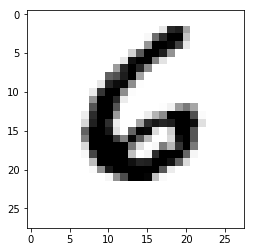

In [10]:
sample_digit = X[90]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

In [11]:
y[10]

'3'

In [12]:
y = y.astype(np.uint8)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary classifier

In [14]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [15]:
y_train_3

array([False, False, False, ..., False, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict([sample_digit])

array([False])

## Measuring Accuracy
K-fold cross validation
Splitting the training data set into K-folds, then making predictions and evaluating them on each fold using a model tained on remaining folds.

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.93720314, 0.9654    , 0.96529826])

### Confusion Matrix

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

array([[53539,   330],
       [ 2312,  3819]], dtype=int64)

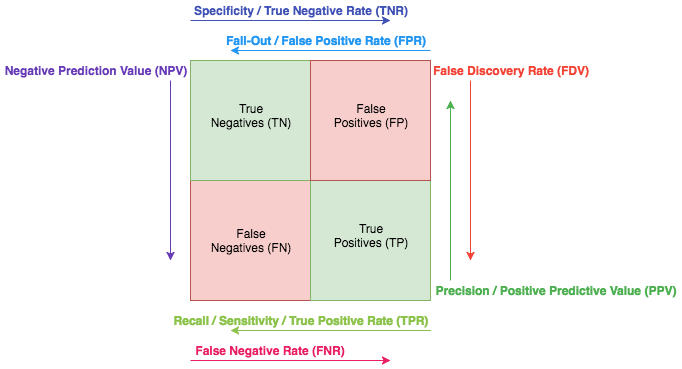

In [27]:
y_train_perfect_predictions = y_train_3  # pretend we reached perfection
confusion_matrix(y_train_3, y_train_perfect_predictions)

array([[53869,     0],
       [    0,  6131]], dtype=int64)

#### Precision:Accuracy of the positive prediction:
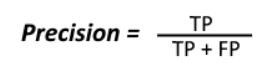

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_pred) 

0.9204627621113521

In [31]:
3819/(3819+330)  ## This means When the model claims an image represents as 3 ,it is correct only 92% of the time.

0.9204627621113521

#### Recall: Sensitivity or True positive rate (TPR)

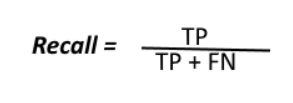

In [32]:
recall_score(y_train_3, y_train_pred)

0.6229000163105529

In [33]:
3819/(3819+2312)  ## This means model can detects only 62% of 3s.

0.6229000163105529

#### F1 Score
Harmonic mean of Precision and Recall.
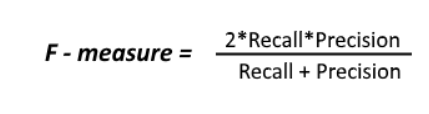

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7429961089494163

#### Self Study: Precision/Recall Tradeoff

### Multiclass classification

In [36]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) 
svm_clf.predict([sample_digit])

array([6], dtype=uint8)

In [38]:
sample_digit_scores = svm_clf.decision_function([sample_digit])
sample_digit_scores

array([[ 2.92625177,  7.02266743,  3.93760468,  1.90355718,  5.96999733,
         0.89820088,  9.5       ,  8.02706533, -0.12853327,  4.94318867]])

In [39]:
np.argmax(sample_digit_scores)

6

In [40]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#### One Vs Rest Approach 

In [41]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier( random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([sample_digit])

D:\Instal_Anaonda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Instal_Anaonda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Instal_Anaonda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

array([6], dtype=uint8)

In [42]:
len(ovr_clf.estimators_)

10

In [48]:
## NOTE> cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.8489802 , 0.87129356, 0.86988048])

In [49]:
### Scalling / Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [50]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
#Multiclass clasification

array([0.89707059, 0.8960948 , 0.90693604])

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5578,    0,   22,    7,    8,   45,   35,    5,  222,    1],
       [   0, 6410,   35,   26,    4,   44,    4,    8,  198,   13],
       [  28,   27, 5232,  100,   74,   27,   68,   37,  354,   11],
       [  23,   18,  115, 5254,    2,  209,   26,   38,  373,   73],
       [  11,   14,   45,   12, 5219,   11,   33,   26,  299,  172],
       [  26,   16,   31,  173,   54, 4484,   76,   14,  482,   65],
       [  31,   17,   45,    2,   42,   98, 5556,    3,  123,    1],
       [  20,   10,   53,   27,   50,   13,    3, 5696,  173,  220],
       [  17,   64,   47,   91,    3,  125,   24,   11, 5421,   48],
       [  24,   18,   29,   67,  116,   39,    1,  174,  329, 5152]],
      dtype=int64)

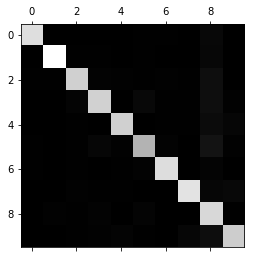

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Remember: Rows represent actual classes & Columns represent predicted classes

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

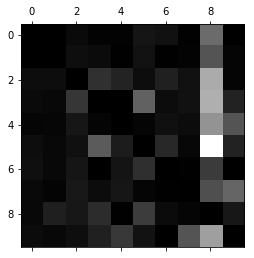

In [55]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

##### Missclasification : (3 &5) (5&3) (5&8) (9&8)